In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
df_train = pd.read_csv('./archive/sign_mnist_train/sign_mnist_train.csv')
df_test = pd.read_csv('./archive/sign_mnist_test/sign_mnist_test.csv')



In [46]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [47]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


<Axes: xlabel='label', ylabel='count'>

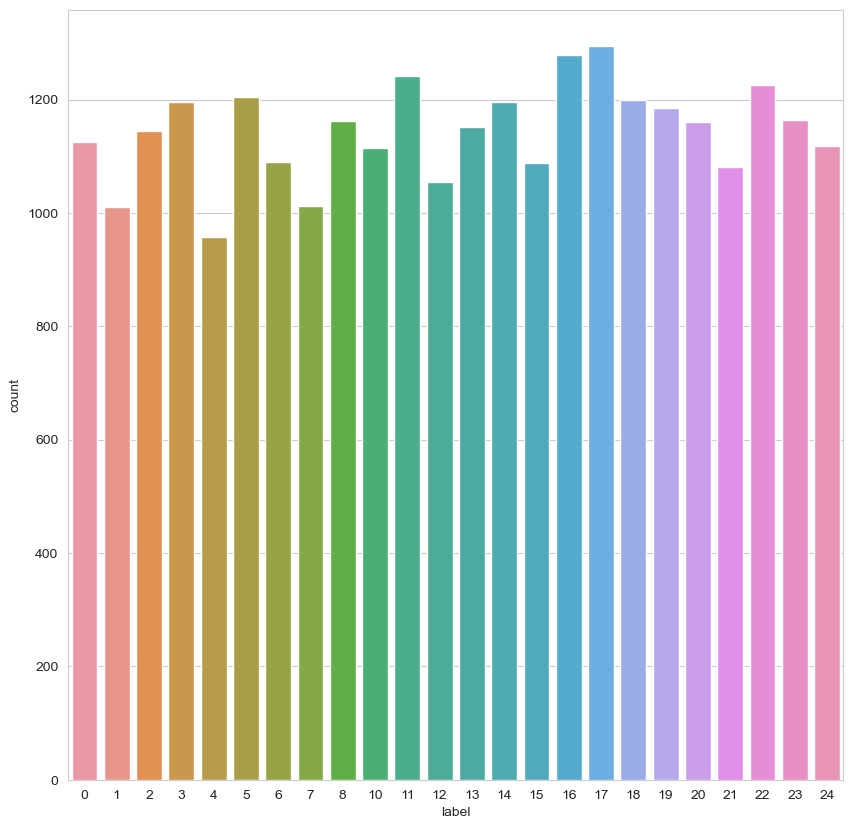

In [48]:
plt.figure(figsize = (10, 10))
sns.set_style("whitegrid")
sns.countplot(data = df_train, x = 'label')

In [49]:
labels = df_train['label'].values
print(labels)

[ 3  6  2 ... 18 17 23]


In [50]:
x = df_train.drop(columns='label').values
x.shape


(27455, 784)

In [51]:
from sklearn.preprocessing import LabelBinarizer
label_b = LabelBinarizer()
labels = label_b.fit_transform(labels)

In [52]:
x = x.reshape(-1, 28, 28)
print(x[0])

[[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
  170 171 171 171 172 171 171 170 170 169]
 [111 121 129 135 141 144 148 151 154 157 160 163 164 170 119 152 171 171
  170 171 172 172 172 172 172 171 171 170]
 [113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142 170 171
  171 171 172 172 173 173 172 171 171 171]
 [116 125 133 139 143 146 151 153 156 159 162 163 167 167  95 144 171 172
  172 172 172 172 173 173 173 172 172 171]
 [117 126 134 140 145 149 153 156 158 161 163 164 175 156  87 154 172 173
  173 173 173 173 174 174 174 173 172 172]
 [119 128 136 142 146 150 153 156 159 163 165 164 184 148  89 164 172 174
  174 174 174 175 175 174 175 174 173 173]
 [122 130 138 143 147 150 154 158 162 165 166 172 181 128  94 170 173 175
  174 175 176 177 177 177 177 175 175 174]
 [122 132 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178
  178 179 179 179 179 178 179 177 175 174]
 [125 134 141 147 150 153 157 161 164 167 168 184 179 116 126 16

C:\Users\tanmo\AppData\Local\Temp\ipykernel_18108\3784839779.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


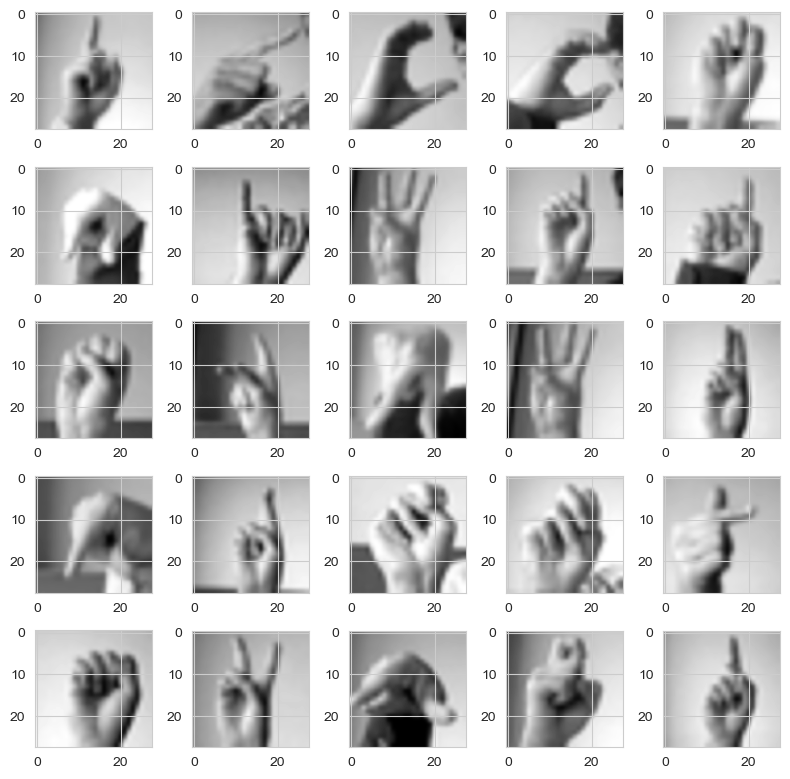

In [53]:
f, ax = plt.subplots(5, 5)
f.set_size_inches(8, 8)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x[k], cmap = 'gray', interpolation='gaussian')
        k+=1
    plt.tight_layout()

In [54]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, labels, train_size= 0.2, random_state= 0)
x_train = x[:21964, :]
y_train = labels[:21964]
x_test = x[21964 :,:]
y_test = labels[21964 :]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21964, 28, 28)
(21964, 24)
(5491, 28, 28)
(5491, 24)


#CNN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

In [56]:
x_train = x_train/255
x_test = x_test/255

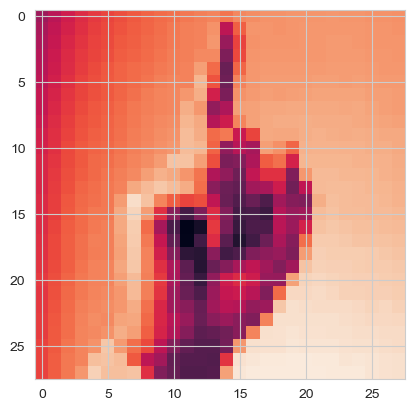

In [57]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28, 28))

In [58]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))


In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(), metrics = ['accuracy'])

In [60]:
trained_model = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = epochs, batch_size=batch_size)

Epoch 1/10


172/172 [==============================] - 9s 42ms/step - loss: 2.5349 - accuracy: 0.2162 - val_loss: 1.4764 - val_accuracy: 0.5729
Epoch 2/10
172/172 [==============================] - 6s 36ms/step - loss: 1.1612 - accuracy: 0.6051 - val_loss: 0.7029 - val_accuracy: 0.7775
Epoch 3/10
172/172 [==============================] - 6s 35ms/step - loss: 0.6904 - accuracy: 0.7614 - val_loss: 0.4347 - val_accuracy: 0.8623
Epoch 4/10
172/172 [==============================] - 6s 35ms/step - loss: 0.4422 - accuracy: 0.8502 - val_loss: 0.2737 - val_accuracy: 0.9131
Epoch 5/10
172/172 [==============================] - 6s 38ms/step - loss: 0.2989 - accuracy: 0.8999 - val_loss: 0.1487 - val_accuracy: 0.9630
Epoch 6/10
172/172 [==============================] - 6s 35ms/step - loss: 0.1981 - accuracy: 0.9372 - val_loss: 0.1506 - val_accuracy: 0.9521
Epoch 7/10
172/172 [==============================] - 6s 37ms/step - loss: 0.1498 - accuracy: 0.9541 - val_loss: 0.0630 - val_accuracy: 0.98

In [1]:
#model.save('sign_detector.keras')

#Start Testing from here
import tensorflow as tf                                      #Keep the bottom two lines for testing
model = tf.keras.models.load_model('sign_detector.keras')

In [2]:
def getLetter(result):
    Labels = {0 : 'A',
              1 : 'B',
              2 : 'C',
              3 : 'D',
              4 : 'E',
              5 : 'F',
              6 : 'G',
              7 : 'H',
              8 : 'I',
              9 : 'K',
              10 : 'L',
              11 : 'M',
              12 : 'N',
              13 : 'O',
              14 : 'P',
              15 : 'Q',
              16 : 'R',
              17 : 'S',
              18 : 'T',
              19 : 'U',
              20 : 'V',
              21 : 'W',
              22 : 'X',
              23 : 'Y'
              }
    try:
        res = int(result)
        return Labels[res]
    except:
        return "Error"

In [5]:
#Test on webcam
import cv2                #Keep this for testing
import numpy as np
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX
while (cap.isOpened()):
    ret, frame = cap.read()

    roi = frame[100 : 400, 20 : 320]
    cv2.imshow('roi', cv2.flip(roi, 1))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28,28), interpolation=cv2.INTER_AREA)
    
    cv2.imshow('scaled and gray', roi)
    
    copy = cv2.flip(frame.copy(), 1)
    cv2.rectangle(copy, (320,100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1, 28, 28, 1)
    
    # result = str(model.predict_class(roi, 1, verbose = 0)[0])
    result = np.argmax(model.predict(roi), axis=-1)
    print(result)
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) & 0xFF == ord('q') :
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 55ms/step
[12]
1/1 [==============================] - 0s 68ms/step
[22]
1/1 [==============================] - 0s 41ms/step
[12]
1/1 [==============================] - 0s 37ms/step
[22]
1/1 [==============================] - 0s 38ms/step
[22]
1/1 [==============================] - 0s 43ms/step
[10]
1/1 [==============================] - 0s 40ms/step
[10]
1/1 [==============================] - 0s 32ms/step
[22]
1/1 [==============================] - 0s 31ms/step
[22]
1/1 [==============================] - 0s 33ms/step
[13]
1/1 [==============================] - 0s 32ms/step
[13]
1/1 [==============================] - 0s 35ms/step
[17]
1/1 [==============================] - 0s 35ms/step
[12]
1/1 [==============================] - 0s 33ms/step
[14]
1/1 [==============================] - 0s 31ms/step
[14]
1/1 [==============================] - 0s 36ms/step
[14]
1/1 [==============================] - 0s 35ms/step
[14]
1/1 [==========================